In [21]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
# Ιδιο Training με το πρώτο μέρος
data = pd.read_csv('dataset.csv', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and test sets (50%-50% ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [23]:
# Function to train k-NN classifier and calculate error
def train_and_evaluate_knn(k, X_train, X_test, y_train, y_test):
    
    
    # Initialize the KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
     # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
     # Predict labels for the test set
    y_pred = knn.predict(X_test)
    
     # Calculate and return the classification error
    error = 1 - accuracy_score(y_test, y_pred)
    return knn, error

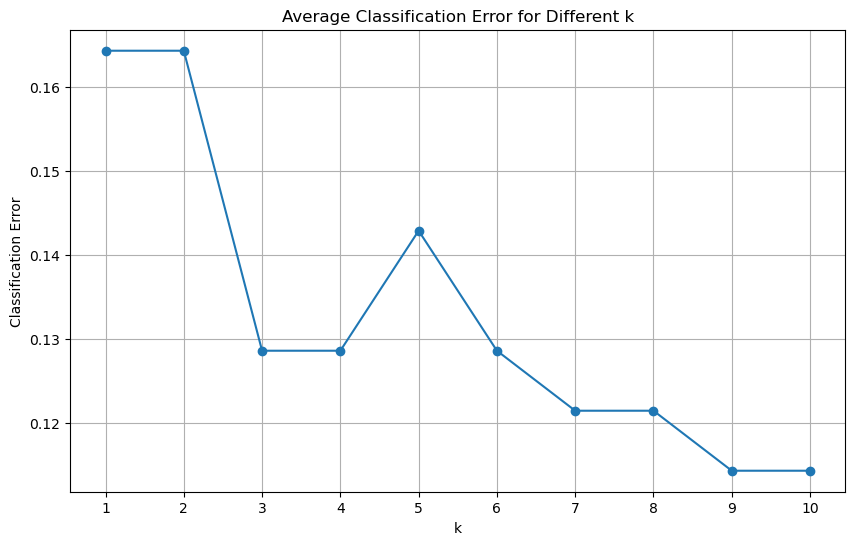

InvalidIndexError: (slice(None, None, None), 0)

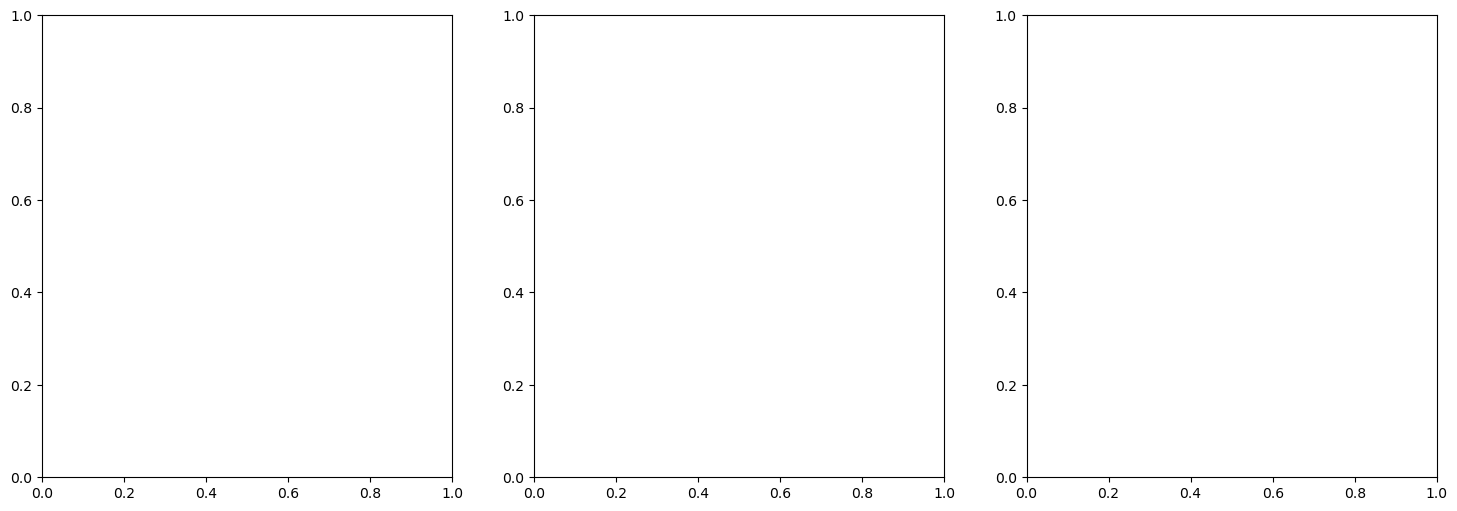

In [31]:
# Function to plot decision boundaries for k-NN
def plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, ax):
    # Train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Create a mesh grid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class for each point in the mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
    ax.set_title(f"k = {k}")
# Train k-NN classifier for k = 1 to 10 and calculate errors
errors = []
for k in range(1, 11):
    knn, error = train_and_evaluate_knn(k, X_train, X_test, y_train, y_test)
    errors.append(error)

# Plotting the errors for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), errors, marker='o')
plt.title('Average Classification Error for Different k')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Plot decision boundaries for k = 1, 5, 10
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, k in enumerate([1, 5, 10]):
    plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, axs[i])
plt.tight_layout()
plt.show()


# Plot decision boundaries for k = 1, 5, 10
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, k in enumerate([1, 5, 10]):
    plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, axs[i])
plt.tight_layout()
plt.show()